In [1]:
import pandas as pd

data = pd.read_csv('data/^NDX_raw_data.csv')
data.rename(columns={'Date': 'date', 'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace=True)

data_backup = data.iloc[3524:]

data = data.iloc[:3524]
data_copy = data.copy()

print('Data imported and copied.', flush=True)

Data imported and copied.


In [2]:
import numpy as np

## Creating sequences
def create_dataset(dataset, time_step=1, output_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-output_step):
        a = dataset[i:(i+time_step), 0]
        b = dataset[(i+time_step):(i+time_step)+output_step, 0]
        dataX.append(a)
        dataY.append(b)

    return np.array(dataX), np.array(dataY)

period = 60
trend_period = 14
rsi_period = 14
num_features = 1
input_period = 60
output_step = 7
units = 512

In [3]:
print('Initializing the Model for Season...', flush=True)

import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, Conv1D, AveragePooling1D, Flatten, Reshape, SimpleRNN, GRU, MaxPooling1D, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.initializers import Zeros

inputs = Input(shape=(input_period, num_features))

model_cnn = Sequential([
    Conv1D(filters=352, kernel_size=1, activation='relu'),
    Conv1D(filters=352, kernel_size=1, activation='relu'),
    MaxPooling1D(pool_size=3),
    Dense(units=128),
    Flatten()
    #Dense(units=output_step),
    #Reshape((output_step,1))
])

model_bilstm = Sequential([
    Bidirectional(LSTM(units=384, return_sequences=True, activation='tanh', recurrent_activation='sigmoid')),
    Dropout(0.2),
    Flatten()
    #Dense(units=output_step),
    #Reshape((output_step,1))
])

model_bigru = Sequential([
    Bidirectional(GRU(units=128, activation='tanh', return_sequences=True)),
    Dropout(0.4),
    Flatten()
])

model_multilayer_lstm = Sequential([
    LSTM(units=64, return_sequences=True, activation='tanh', recurrent_activation='sigmoid'),
    Dropout(0.2),
    LSTM(units=64, return_sequences=True, activation='tanh', recurrent_activation='sigmoid'),
    Flatten()
])

output_cnn = model_cnn(inputs)
output_bilstm = model_bilstm(inputs)
output_bigru = model_bigru(inputs)
output_multilayer_lstm = model_multilayer_lstm(inputs)

concatenated_outputs = concatenate([output_cnn, output_bilstm, output_bigru, output_multilayer_lstm])

main_model = Sequential([
    Input(shape=(concatenated_outputs.shape[1],)),
    Dense(units=output_step),
    Reshape((output_step,1))
])

final_output = main_model(concatenated_outputs)

functional_pipeline_season = Model(inputs=inputs, outputs=final_output)

# Compile the pipeline model
functional_pipeline_season.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

print('Model has been initialized.', flush=True)

Initializing the Model for Season...


2024-06-04 05:49:04.184217: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-04 05:49:04.253994: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 05:49:04.254055: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 05:49:04.256487: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-04 05:49:04.268822: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-04 05:49:05.893382: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

Model has been initialized.


In [4]:
print('Initializing the Model for Savitzky-Golay...', flush=True)

import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, Conv1D, AveragePooling1D, Flatten, Reshape, SimpleRNN, GRU, MaxPooling1D, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.initializers import Zeros

inputs = Input(shape=(input_period, num_features))

model_cnn = Sequential([
    Conv1D(filters=352, kernel_size=1, activation='relu'),
    Conv1D(filters=352, kernel_size=1, activation='relu'),
    MaxPooling1D(pool_size=3),
    Dense(units=128),
    Flatten()
    #Dense(units=output_step),
    #Reshape((output_step,1))
])

model_bilstm = Sequential([
    Bidirectional(LSTM(units=384, return_sequences=True, activation='tanh', recurrent_activation='sigmoid')),
    Dropout(0.2),
    Flatten()
    #Dense(units=output_step),
    #Reshape((output_step,1))
])

model_bigru = Sequential([
    Bidirectional(GRU(units=128, activation='tanh', return_sequences=True)),
    Dropout(0.4),
    Flatten()
])

model_multilayer_lstm = Sequential([
    LSTM(units=64, return_sequences=True, activation='tanh', recurrent_activation='sigmoid'),
    Dropout(0.2),
    LSTM(units=64, return_sequences=True, activation='tanh', recurrent_activation='sigmoid'),
    Flatten()
])

output_cnn = model_cnn(inputs)
output_bilstm = model_bilstm(inputs)
output_bigru = model_bigru(inputs)
output_multilayer_lstm = model_multilayer_lstm(inputs)

concatenated_outputs = concatenate([output_cnn, output_bilstm, output_bigru, output_multilayer_lstm])

main_model = Sequential([
    Input(shape=(concatenated_outputs.shape[1],)),
    Dense(units=output_step),
    Reshape((output_step,1))
])

final_output = main_model(concatenated_outputs)

functional_pipeline_savgol = Model(inputs=inputs, outputs=final_output)

# Compile the pipeline model
functional_pipeline_savgol.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

print('Model has been initialized.', flush=True)

Initializing the Model for Savitzky-Golay...
Model has been initialized.


In [5]:
best_epoch_backup_savgol = 68

# Load the weights of the model at the chosen epoch
functional_pipeline_savgol.load_weights(f'model_weights_6_5_topological_trend/model_weights_epoch_{best_epoch_backup_savgol:02d}.h5')
print('Backup: Savitzky-Golay Weigths for the best epoch has been loaded.')

Backup: Savitzky-Golay Weigths for the best epoch has been loaded.


In [6]:
best_epoch_backup_season = 30

# Load the weights of the model at the chosen epoch
functional_pipeline_season.load_weights(f'model_weights_6_5_topological/model_weights_epoch_{best_epoch_backup_season:02d}.h5')
print('Backup: Season Weigths for the best epoch has been loaded.')

Backup: Season Weigths for the best epoch has been loaded.


## data preprocessing

In [7]:
print('Importing the bulk data...', flush=True)

import os
import re

directory = 'data-china-from2018-test'

df_data = dict()

for file in os.listdir(directory):
    symbol_pattern = re.match(r'([^_]+)_', file)
    symbol = symbol_pattern.group(1)
    df_data[symbol] = pd.read_csv(os.path.join(directory, file))
    df_data[symbol].rename(columns={'Date': 'date', 'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace=True)

print('Bulk data has been imported.', flush=True)

Importing the bulk data...
Bulk data has been imported.


In [8]:
df_data[symbol].shape

(1614, 6)

In [9]:
print('Creating the data sets...', flush=True)

dict_X_test, dict_y_test = dict(), dict()

for symbol in df_data:
    X_test, y_test = create_dataset(df_data[symbol][['close']].to_numpy(), time_step=period, output_step=output_step)

    dict_X_test[symbol] = X_test
    dict_y_test[symbol] = y_test

print('Data sets has been created.', flush=True)

Creating the data sets...
Data sets has been created.


In [10]:
dict_X_test[symbol].shape

(1547, 60)

In [11]:
print('Decomposing data...', flush=True)

from statsmodels.tsa.seasonal import seasonal_decompose

dict_decompositions = dict()
dict_season = dict()

for symbol in df_data:
    decompositions = np.array([seasonal_decompose(dict_X_test[symbol][i], model='additive', period=14) for i in range(dict_X_test[symbol].shape[0])])
    seasons = np.array([decompositions[i].seasonal for i in range(decompositions.shape[0])])

    dict_decompositions[symbol] = decompositions
    dict_season[symbol] = seasons

from scipy.signal import savgol_filter

# Apply Savitzky-Golay filter
window_length = 17  # Window length (must be odd)
polyorder = 1      # Polynomial order

dict_savgol = dict()

for symbol in df_data:
    savgol_test = np.array([ savgol_filter(dict_X_test[symbol][i], window_length, polyorder) for i in range(dict_X_test[symbol].shape[0]) ])

    dict_savgol[symbol] = savgol_test

print('Decomposition has been applied.', flush=True)

Decomposing data...
Decomposition has been applied.


In [12]:
print('Scaling data...', flush=True)

dict_savgol_dropna = dict()
dict_seasons_cropped = dict()

# NO NEED TO CROP THEM
for symbol in df_data:
    savgol_test_dropna = list()
    seasons_test_cropped = list()
    
    for savgol in dict_savgol[symbol]:
        savgol_test_dropna.append(savgol)

    for season in dict_season[symbol]:
        seasons_test_cropped.append(season)

    savgol_test_dropna = np.array(savgol_test_dropna)
    seasons_test_cropped = np.array(seasons_test_cropped)

    dict_savgol_dropna[symbol] = savgol_test_dropna
    dict_seasons_cropped[symbol] = seasons_test_cropped

from sklearn.preprocessing import MinMaxScaler

dict_scalers_savgol = dict()
dict_scalers_seasonal = dict()
dict_scalers_target = dict()
dict_savgol_scaled = dict()
dict_seasons_scaled = dict()
dict_targets_scaled = dict()


for symbol in df_data:
    scaler_savgol = list(MinMaxScaler() for i in range(dict_savgol_dropna[symbol].shape[0]))
    savgol_test_scaled = list()

    scaler_seasonal = list(MinMaxScaler() for i in range(dict_seasons_cropped[symbol].shape[0]))
    seasons_test_scaled = list()

    # we use target values only for comparison issue here
    scaler_target = list(MinMaxScaler() for i in range(dict_y_test[symbol].shape[0]))
    target_test_scaled = list()

    for i in range(dict_savgol_dropna[symbol].shape[0]):
        savgol_test_scaled.append(scaler_savgol[i].fit_transform(dict_savgol_dropna[symbol][i].reshape(-1,1)))

    for j in range(dict_y_test[symbol].shape[0]):
        target_test_scaled.append(scaler_target[j].fit_transform(dict_y_test[symbol][j].reshape(-1,1)))

    for j in range(dict_seasons_cropped[symbol].shape[0]):
        seasons_test_scaled.append(scaler_seasonal[j].fit_transform(dict_seasons_cropped[symbol][j].reshape(-1,1)))

    savgol_test_scaled = np.array(savgol_test_scaled)
    target_test_scaled = np.array(target_test_scaled)
    seasons_test_scaled = np.array(seasons_test_scaled)

    dict_scalers_savgol[symbol] = scaler_savgol
    dict_scalers_seasonal[symbol] = scaler_seasonal
    dict_scalers_target[symbol] = scaler_target
    dict_savgol_scaled[symbol] = savgol_test_scaled
    dict_seasons_scaled[symbol] = seasons_test_scaled
    dict_targets_scaled[symbol] = target_test_scaled

print('Data scaled.', flush=True)

Scaling data...
Data scaled.


In [13]:
print('Preparing input data...', flush=True)

dict_x_input_savgol = dict()

for symbol in df_data:
    x_input = list()

    for savgol in dict_savgol_scaled[symbol]:
        x_input.append(savgol)

    x_input = np.array(x_input)

    dict_x_input_savgol[symbol] = x_input

dict_x_input_season = dict()

for symbol in df_data:
    x_input = list()

    for season in dict_seasons_scaled[symbol]:
        x_input.append(season)

    x_input = np.array(x_input)

    dict_x_input_season[symbol] = x_input

print('Input data has been prepared.', flush=True)

Preparing input data...
Input data has been prepared.


In [14]:
dict_x_input_savgol[symbol].shape

(1547, 60, 1)

In [15]:
print('Predicting...', flush=True)

dict_predictions_savgol = dict()
dict_predictions_season = dict()

from tqdm import tqdm
for nb, symbol in tqdm(enumerate(df_data)):
    savgol_predictions = list()
    season_predictions = list()

    for j in range(dict_x_input_savgol[symbol].shape[0]):
        if (j+1) % 100 == 0:
            print(j+1)
            
        savgol_predictions.append(
            dict_scalers_savgol[symbol][j].inverse_transform(
                functional_pipeline_savgol.predict(dict_x_input_savgol[symbol][j].reshape(savgol_test_scaled[j].shape[1], input_period, num_features), verbose=0)[0].reshape(1,output_step)
            )
        )
        season_predictions.append(
            dict_scalers_seasonal[symbol][j].inverse_transform(
                functional_pipeline_season.predict(dict_x_input_season[symbol][j].reshape(seasons_test_scaled[j].shape[1], input_period, num_features), verbose=0)[0].reshape(1,output_step)
            )
        )
    
    savgol_predictions = np.array(savgol_predictions)
    season_predictions = np.array(season_predictions)

    dict_predictions_savgol[symbol] = savgol_predictions
    dict_predictions_season[symbol] = season_predictions

Predicting...


0it [00:00, ?it/s]

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


1it [07:26, 446.49s/it]

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


2it [14:48, 443.58s/it]

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


3it [22:43, 454.39s/it]


In [16]:
savgol_predictions.shape, 1547+60+7

((1547, 1, 7), 1614)

In [17]:
print('Adding noise to data...', flush=True)

dict_std_dev_noise = dict()

for symbol in df_data:
    noise_high, _ = create_dataset(df_data[symbol][['high']].to_numpy(), time_step=period, output_step=output_step)
    noise_low, _ = create_dataset(df_data[symbol][['low']].to_numpy(), time_step=period, output_step=output_step)

    std_dev_high = np.array([np.std(val) for val in noise_high])
    std_dev_low = np.array([np.std(val) for val in noise_low])
    
    std_dev_noise = np.array([np.maximum(val_high, val_low) for val_high, val_low in zip(std_dev_high, std_dev_low)])

    dict_std_dev_noise[symbol] = std_dev_noise

print('Noise to data has been added.', flush=True)

Adding noise to data...
Noise to data has been added.


In [18]:
dict_predictions_savgol[symbol].shape, output_step, dict_std_dev_noise[symbol].shape

((1547, 1, 7), 7, (1547,))

In [19]:
print('Constructing observations (sum) for data...', flush=True)

dict_observations_sum = dict()

for symbol in df_data:
    observation = pd.Series([
        dict_predictions_savgol[symbol][i] + 3*dict_predictions_season[symbol][i] for i in range(dict_predictions_savgol[symbol].shape[0])
    ], index=df_data[symbol].index[input_period:-output_step])

    dict_observations_sum[symbol] = observation

print('Observations have been constructed.', flush=True)

Constructing observations (sum) for data...
Observations have been constructed.


In [20]:
dict_observations_sum[symbol], dict_observations_sum[symbol].index, input_period

(60      [[31.02887, 32.51212, 32.560146, 32.761528, 34...
 61      [[31.969322, 31.91431, 32.675144, 33.47715, 34...
 62      [[31.468706, 32.14055, 33.745224, 34.21048, 37...
 63      [[31.775793, 33.328373, 33.384537, 37.31958, 3...
 64      [[32.817398, 32.822586, 35.862206, 36.247677, ...
                               ...                        
 1602    [[6.276459, 6.7036185, 6.679894, 6.6436133, 6....
 1603    [[6.608438, 6.5735946, 6.7211704, 6.054988, 6....
 1604    [[6.513887, 6.644008, 6.397975, 6.0883217, 6.8...
 1605    [[6.6647077, 6.4164767, 6.495219, 6.876532, 6....
 1606    [[6.380654, 6.4438314, 7.271595, 6.5759687, 6....
 Length: 1547, dtype: object,
 RangeIndex(start=60, stop=1607, step=1),
 60)

In [75]:
print('Calculating slopes of predicted data...', flush=True)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

dict_slopes_pred = dict()

for symbol in df_data:
    slopes_pred = list()
    
    #scaler_x_reg, scaler_y_reg = MinMaxScaler(), MinMaxScaler()
    #model_reg = LinearRegression()

    for i in dict_observations_sum[symbol].index:
        scaler_x_reg, scaler_y_reg = MinMaxScaler(), MinMaxScaler()
        model_reg = LinearRegression()
    
        X_reg = np.array([ t for t in range(i, i+output_step) ])
        X_reg_norm = scaler_x_reg.fit_transform(X_reg.reshape(-1,1))

        y_reg = dict_observations_sum[symbol][i][0]
        y_reg_norm = scaler_y_reg.fit_transform(y_reg.reshape(-1,1))

        model_reg.fit(X_reg_norm, y_reg_norm)

        slopes_pred.append(model_reg.coef_[0][0])

    dict_slopes_pred[symbol] = np.array(slopes_pred)

Calculating slopes of predicted data...


In [76]:
dict_observations_sum[symbol].shape, dict_slopes_pred[symbol].shape, x_grad.shape

((1547,), (1547,), (1547,))

In [83]:
print('Calculating gradient of the slope...', flush=True)

import numpy as np
import pandas as pd

dict_grad_slope = dict()
dict_neg_to_pos = dict()

for symbol in df_data:
    x_grad = np.array([ t for t in dict_observations_sum[symbol].index ])

    # Calculate the numerical derivative (dy/dx)
    dy_dx = np.gradient(dict_slopes_pred[symbol], x_grad)

    # Identify points where the slope changes from negative to positive
    neg_to_pos = np.where((np.diff(np.sign(dy_dx)) == 2))[0]

    neg_to_pos_series = pd.Series(0, index=dict_observations_sum[symbol].index)
    neg_to_pos_series.iloc[neg_to_pos] = 1
    
    dict_grad_slope[symbol] = dy_dx
    dict_neg_to_pos[symbol] = neg_to_pos_series

Calculating gradient of the slope...


In [110]:
dict_slopes_pred[symbol][:20]

array([ 0.84108766,  1.10654119,  0.90808971,  0.60930511,  0.24426617,
       -0.47005943, -0.85251914, -0.73600418, -0.97590515, -0.84340709,
       -0.45924568, -0.19875363, -0.29271872,  0.61500631,  0.57584095,
        0.85026925,  0.6557857 ,  0.26003613, -0.2463212 , -0.58153224])

In [109]:
np.sign(dy_dx)[:20]

array([ 1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1., -1., -1.])

In [107]:
dict_slopes_pred[symbol][:70], neg_to_pos

(array([ 0.84108766,  1.10654119,  0.90808971,  0.60930511,  0.24426617,
        -0.47005943, -0.85251914, -0.73600418, -0.97590515, -0.84340709,
        -0.45924568, -0.19875363, -0.29271872,  0.61500631,  0.57584095,
         0.85026925,  0.6557857 ,  0.26003613, -0.2463212 , -0.58153224,
        -0.6918633 , -0.73917542, -0.65096692, -0.09101077,  0.40977287,
         0.64672841,  0.63489165,  1.05894419,  0.79604714,  0.90863596,
         0.94330287,  0.8861989 ,  0.93502869,  0.76414592,  0.7055957 ,
         0.48535701,  0.31305906,  0.25030824,  0.27678721,  0.4923514 ,
         0.49634968,  0.84056956,  0.83535106,  0.6487766 ,  0.46195998,
         0.3352935 ,  0.58885615,  0.25605338, -0.17277329, -0.70254922,
        -1.01863636, -1.09123472, -0.98473324, -0.41448171, -0.01991732,
         0.03365197, -0.39879451, -0.61818021, -0.79299535, -0.62771732,
        -0.12397139,  0.89298984,  1.0421413 ,  0.41451022, -0.25281838,
        -0.58691342, -0.70689961, -0.43797408, -0.0

In [99]:
neg_to_pos

array([   8,   20,   28,   37,   44,   50,   58,   65,   72,   79,   84,
         94,   98,  107,  120,  126,  136,  140,  147,  154,  161,  169,
        174,  182,  188,  197,  201,  214,  228,  234,  241,  248,  255,
        264,  266,  280,  288,  297,  315,  328,  334,  341,  353,  363,
        366,  369,  376,  380,  386,  394,  397,  408,  411,  413,  422,
        428,  435,  443,  449,  462,  475,  478,  486,  493,  501,  509,
        524,  530,  537,  540,  544,  560,  573,  576,  587,  590,  601,
        607,  613,  617,  620,  627,  631,  640,  656,  669,  681,  684,
        694,  699,  711,  723,  730,  736,  739,  752,  758,  765,  772,
        779,  786,  800,  812,  825,  838,  841,  845,  848,  861,  869,
        876,  884,  891,  895,  902,  909,  916,  921,  924,  930,  935,
        939,  944,  953,  959,  968,  972,  982,  989,  997, 1000, 1010,
       1017, 1024, 1037, 1045, 1052, 1056, 1060, 1063, 1070, 1083, 1093,
       1096, 1104, 1106, 1110, 1113, 1123, 1127, 11

In [92]:
neg_to_pos_series.iloc[neg_to_pos]

68      1
80      1
88      1
97      1
104     1
       ..
1576    1
1581    1
1583    1
1594    1
1597    1
Length: 203, dtype: int64

In [71]:
dict_grad_slope[symbol].shape, dict_neg_to_pos[symbol].shape, x_grad.shape, dy_dx, neg_to_pos

((1547,),
 (1547,),
 (1547,),
 array([ 0.26545353,  0.03350102, -0.24861804, ..., -0.2440145 ,
        -0.329107  , -0.15150363]),
 array([   8,   20,   28,   37,   44,   50,   58,   65,   72,   79,   84,
          94,   98,  107,  120,  126,  136,  140,  147,  154,  161,  169,
         174,  182,  188,  197,  201,  214,  228,  234,  241,  248,  255,
         264,  266,  280,  288,  297,  315,  328,  334,  341,  353,  363,
         366,  369,  376,  380,  386,  394,  397,  408,  411,  413,  422,
         428,  435,  443,  449,  462,  475,  478,  486,  493,  501,  509,
         524,  530,  537,  540,  544,  560,  573,  576,  587,  590,  601,
         607,  613,  617,  620,  627,  631,  640,  656,  669,  681,  684,
         694,  699,  711,  723,  730,  736,  739,  752,  758,  765,  772,
         779,  786,  800,  812,  825,  838,  841,  845,  848,  861,  869,
         876,  884,  891,  895,  902,  909,  916,  921,  924,  930,  935,
         939,  944,  953,  959,  968,  972,  982,  989,

In [86]:
dict_neg_to_pos[symbol][:40]

60    0
61    0
62    0
63    0
64    0
65    0
66    0
67    0
68    1
69    0
70    0
71    0
72    0
73    0
74    0
75    0
76    0
77    0
78    0
79    0
80    1
81    0
82    0
83    0
84    0
85    0
86    0
87    0
88    1
89    0
90    0
91    0
92    0
93    0
94    0
95    0
96    0
97    1
98    0
99    0
dtype: int64

In [58]:
dict_observations_sum[symbol]

60      [[31.02887, 32.51212, 32.560146, 32.761528, 34...
61      [[31.969322, 31.91431, 32.675144, 33.47715, 34...
62      [[31.468706, 32.14055, 33.745224, 34.21048, 37...
63      [[31.775793, 33.328373, 33.384537, 37.31958, 3...
64      [[32.817398, 32.822586, 35.862206, 36.247677, ...
                              ...                        
1602    [[6.276459, 6.7036185, 6.679894, 6.6436133, 6....
1603    [[6.608438, 6.5735946, 6.7211704, 6.054988, 6....
1604    [[6.513887, 6.644008, 6.397975, 6.0883217, 6.8...
1605    [[6.6647077, 6.4164767, 6.495219, 6.876532, 6....
1606    [[6.380654, 6.4438314, 7.271595, 6.5759687, 6....
Length: 1547, dtype: object

In [95]:
dict_slopes_pred[symbol][50:70]

array([-1.01863636, -1.09123472, -0.98473324, -0.41448171, -0.01991732,
        0.03365197, -0.39879451, -0.61818021, -0.79299535, -0.62771732,
       -0.12397139,  0.89298984,  1.0421413 ,  0.41451022, -0.25281838,
       -0.58691342, -0.70689961, -0.43797408, -0.03080239,  0.31768738])

In [111]:
data_output = df_data.copy()

count = 0

for symbol in df_data:
    count += 1

    _obs = [dict_observations_sum[symbol][k+input_period] for k in range(dict_observations_sum[symbol].shape[0])]
    _res = []
    for obs in _obs:
        _res.append(obs.reshape(-1,output_step)[0])
    
    observation_df = pd.DataFrame([r for r in _res], columns=[f'pred_{i}' for i in range(output_step)], index=df_data[symbol].index[input_period:-output_step])
    data_output[symbol] = pd.concat([data_output[symbol], observation_df], axis=1, join='outer')

    noise_df = pd.DataFrame(dict_std_dev_noise[symbol], columns=['noise'], index=df_data[symbol].index[input_period:-output_step])
    data_output[symbol] = pd.concat([data_output[symbol], noise_df], axis=1, join='outer')

    slope_df = pd.DataFrame(dict_slopes_pred[symbol], columns=['slope'], index=df_data[symbol].index[input_period:-output_step])
    data_output[symbol] = pd.concat([data_output[symbol], slope_df], axis=1, join='outer')

    grad_slope_df = pd.DataFrame(dict_grad_slope[symbol], columns=['gradient'], index=df_data[symbol].index[input_period:-output_step])
    data_output[symbol] = pd.concat([data_output[symbol], grad_slope_df], axis=1, join='outer')
    
    neg_to_pos_df = pd.DataFrame(dict_neg_to_pos[symbol], columns=['neg_to_pos'], index=df_data[symbol].index[input_period:-output_step])
    data_output[symbol] = pd.concat([data_output[symbol], neg_to_pos_df], axis=1, join='outer')

    data_output[symbol].to_excel(f'data_w_pred_m6_5-topological-ensemble-bulk/{symbol}_w_pred_m5.xlsx')
    
    print(f'{count} done for {symbol}', flush=True)

1 done for 000063.SZ
2 done for 000001.SS
3 done for 000002.SZ


In [91]:
slope_df.iloc[:40]

,slope
60,0.841088
61,1.106541
62,0.908090
63,0.609305
64,0.244266
65,-0.470059
66,-0.852519
67,-0.736004
68,-0.975905
69,-0.843407


In [98]:
slope_df.iloc[0]

slope    0.841088
Name: 60, dtype: float64

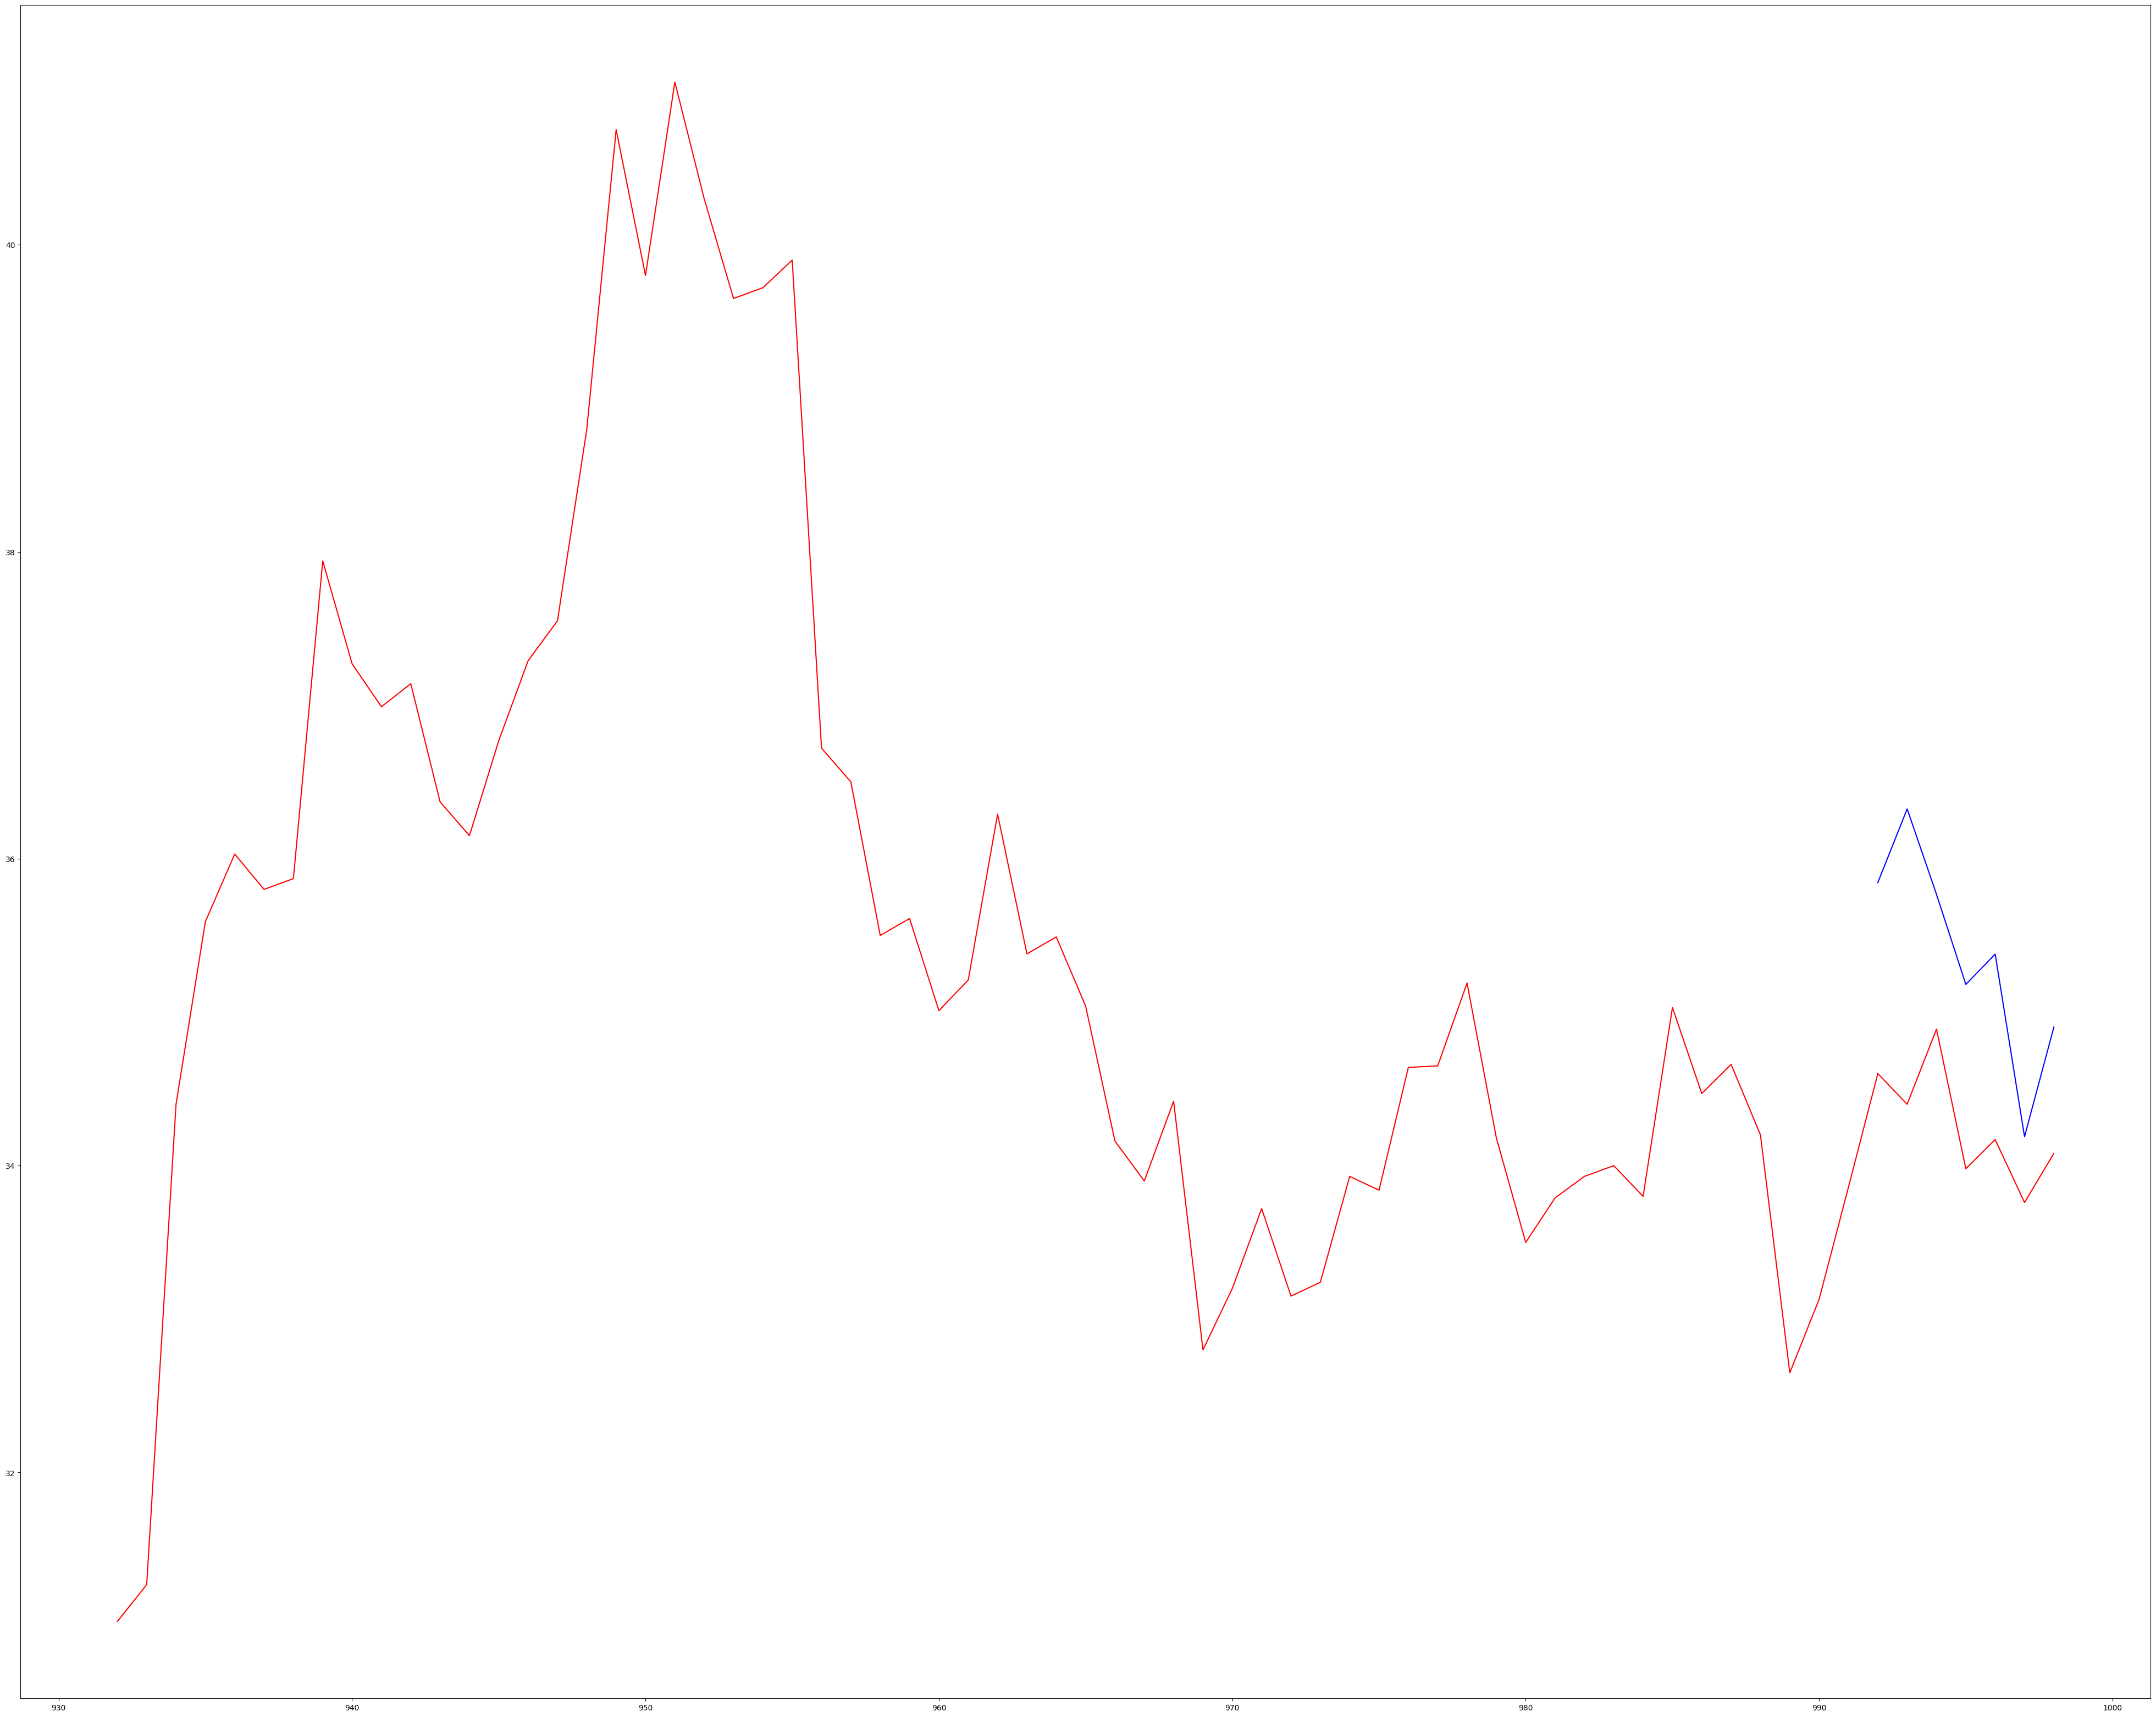

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 40))

t = 922+10

plt.plot(df_data['000063.SZ'].index[t+60:t+67], dict_observations_sum['000063.SZ'][t+7][0], color='blue')
plt.plot(df_data['000063.SZ'].index[t:t+67], df_data['000063.SZ']['close'].iloc[t:t+67], color='red')

In [59]:
print('Constructing observations (separate) for data...', flush=True)

dict_observations_savgol = dict()

for symbol in df_data:
    observation = pd.Series([
        dict_predictions_savgol[symbol][i] for i in range(dict_predictions_savgol[symbol].shape[0])
    ], index=df_data[symbol].index[output_step:-period])

    dict_observations_savgol[symbol] = observation

dict_observations_season = dict()

for symbol in df_data:
    observation = pd.Series([
        dict_predictions_season[symbol][i] for i in range(dict_predictions_season[symbol].shape[0])
    ], index=df_data[symbol].index[output_step:-period])

    dict_observations_season[symbol] = observation

print('Observations have been constructed.', flush=True)

Constructing observations (sum) for data...
Observations have been constructed.


In [60]:
data_output = df_data.copy()

count = 0

for symbol in df_data:
    count += 1

    _obs_savgol = [dict_observations_savgol[symbol][k+7] for k in range(dict_observations_savgol[symbol].shape[0])]
    _res_savgol = []
    for obs in _obs_savgol:
        _res_savgol.append(obs.reshape(-1,output_step)[0])

    _obs_season = [dict_observations_season[symbol][k+7] for k in range(dict_observations_season[symbol].shape[0])]
    _res_season = []
    for ssn in _obs_season:
        _res_season.append(ssn.reshape(-1,output_step)[0])
    
    observation_savgol_df = pd.DataFrame([r for r in _res_savgol], columns=[f'savgol_{i}' for i in range(output_step)], index=df_data[symbol].index[7:-60])
    observation_season_df = pd.DataFrame([r for r in _res_season], columns=[f'season_{i}' for i in range(output_step)], index=df_data[symbol].index[7:-60])
    noise_df = pd.DataFrame(dict_std_dev_noise[symbol], columns=['noise'], index=df_data[symbol].index[7:-60])
    
    data_output[symbol] = pd.concat([data_output[symbol], observation_savgol_df, observation_season_df, noise_df], axis=1, join='inner')

    for i in range(output_step):
        data_output[symbol][f'savgol_{i}'] = data_output[symbol][f'savgol_{i}'].shift(53)
        data_output[symbol][f'season_{i}'] = data_output[symbol][f'season_{i}'].shift(53)

    data_output[symbol].to_excel(f'data_w_pred_m6_5-topological-ensemble-bulk-2/{symbol}_w_pred_m5.xlsx')
    
    print(f'{count} done for {symbol}', flush=True)

1 done for 000063.SZ
2 done for 000001.SS
3 done for 000002.SZ
